Here are the main questions to be answered:

What can be done with this?

How different regions of Brazil saw their gas prices change?

Within a region, which states increased more their prices?

Which states are the cheapest (or most expensive) for different types of fuels?

Let's start by importing all libs that we are going to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling


Now, we need to read the file and get in touch with what it's in there.

In [2]:
df = pd.read_csv('2004-2019.tsv',sep = '\t', index_col = 0)

In [3]:
df.head(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
DATA INICIAL                     106823 non-null object
DATA FINAL                       106823 non-null object
REGIÃO                           106823 non-null object
ESTADO                           106823 non-null object
PRODUTO                          106823 non-null object
NÚMERO DE POSTOS PESQUISADOS     106823 non-null int64
UNIDADE DE MEDIDA                106823 non-null object
PREÇO MÉDIO REVENDA              106823 non-null float64
DESVIO PADRÃO REVENDA            106823 non-null float64
PREÇO MÍNIMO REVENDA             106823 non-null float64
PREÇO MÁXIMO REVENDA             106823 non-null float64
MARGEM MÉDIA REVENDA             106823 non-null object
COEF DE VARIAÇÃO REVENDA         106823 non-null float64
PREÇO MÉDIO DISTRIBUIÇÃO         106823 non-null object
DESVIO PADRÃO DISTRIBUIÇÃO       106823 non-null object
PREÇO MÍNIMO DISTRIBUIÇÃO        106823 non-n

As we can see it would good to change the column name to a more appropriate one. Also, we have to dates that use the object type.

In [5]:
df.columns = ['begin_date', 'end_date', 'region', 'state', 'product', 
              'num_gas_stations', 'measure_unit', 'mean_resale_price',
             'std_resale_price', 'min_resale_price', 'max_resale_price',
             'mean_resale_margin', 'coef_resale_variation', 'mean_distribution_price',
             'std_distribution_price', 'min_distribution_price', 'max_distribution_price',
             'coef_distribution_variation', 'month', 'year']

df.columns.tolist()

['begin_date',
 'end_date',
 'region',
 'state',
 'product',
 'num_gas_stations',
 'measure_unit',
 'mean_resale_price',
 'std_resale_price',
 'min_resale_price',
 'max_resale_price',
 'mean_resale_margin',
 'coef_resale_variation',
 'mean_distribution_price',
 'std_distribution_price',
 'min_distribution_price',
 'max_distribution_price',
 'coef_distribution_variation',
 'month',
 'year']

All column names have been converted from portuguese to english. Next is step is to convert some types.

In [6]:
datetypes = ['begin_date','end_date']
for col in datetypes:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', exact = True)

numtypes = ['mean_resale_margin', 'mean_distribution_price', 'std_distribution_price', 
            'min_distribution_price', 'max_distribution_price', 'coef_distribution_variation']

for col in numtypes:
    df[col] = pd.to_numeric(df[col], errors = 'coerse')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
begin_date                     106823 non-null datetime64[ns]
end_date                       106823 non-null datetime64[ns]
region                         106823 non-null object
state                          106823 non-null object
product                        106823 non-null object
num_gas_stations               106823 non-null int64
measure_unit                   106823 non-null object
mean_resale_price              106823 non-null float64
std_resale_price               106823 non-null float64
min_resale_price               106823 non-null float64
max_resale_price               106823 non-null float64
mean_resale_margin             103392 non-null float64
coef_resale_variation          106823 non-null float64
mean_distribution_price        103423 non-null float64
std_distribution_price         103423 non-null float64
min_distribution_price         103423 non-null float64
m

In [7]:
df.head(5)

,begin_date,end_date,region,state,product,num_gas_stations,measure_unit,mean_resale_price,std_resale_price,min_resale_price,max_resale_price,mean_resale_margin,coef_resale_variation,mean_distribution_price,std_distribution_price,min_distribution_price,max_distribution_price,coef_distribution_variation,month,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004


Now that all types have been correctly set, we need to remove any missing value in the dataset.

In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103392 entries, 0 to 106822
Data columns (total 20 columns):
begin_date                     103392 non-null datetime64[ns]
end_date                       103392 non-null datetime64[ns]
region                         103392 non-null object
state                          103392 non-null object
product                        103392 non-null object
num_gas_stations               103392 non-null int64
measure_unit                   103392 non-null object
mean_resale_price              103392 non-null float64
std_resale_price               103392 non-null float64
min_resale_price               103392 non-null float64
max_resale_price               103392 non-null float64
mean_resale_margin             103392 non-null float64
coef_resale_variation          103392 non-null float64
mean_distribution_price        103392 non-null float64
std_distribution_price         103392 non-null float64
min_distribution_price         103392 non-null float64
m

As we can see, we lost some data due to some columns 

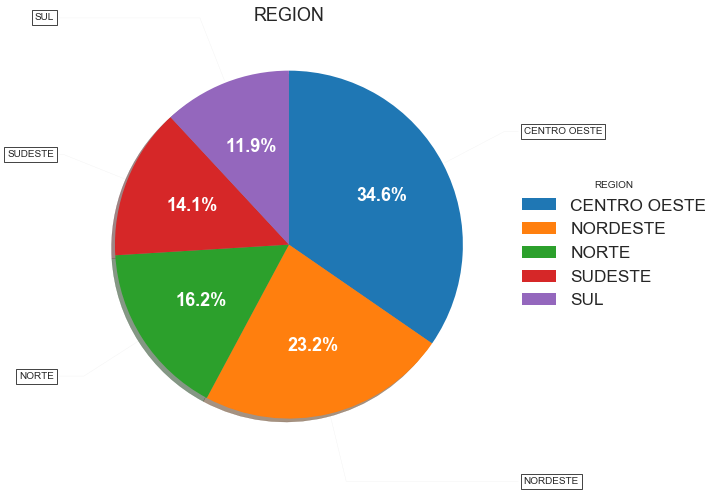

In [9]:

def plt_pie_data(name, df):
    # name = column name and df = dataframe
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(df[name].value_counts().values, autopct='%1.1f%%',
            shadow=True, startangle=90, counterclock = False, textprops=dict(color="w",size = "xx-large"))
    
    ax.legend(wedges, df[name].unique(),
              title=df[name].value_counts().name.upper(),
              loc="center left",
              bbox_to_anchor=(1, -.5, 2, 2),
              fontsize = 'xx-large'
             )
    ax.set_title(df[name].value_counts().name.upper(), fontsize = 18, loc = 'center')
    plt.setp(autotexts, size=18, weight="bold")
    
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(df[name].unique()[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)


    plt.show()
    return
plt_pie_data("region",df)

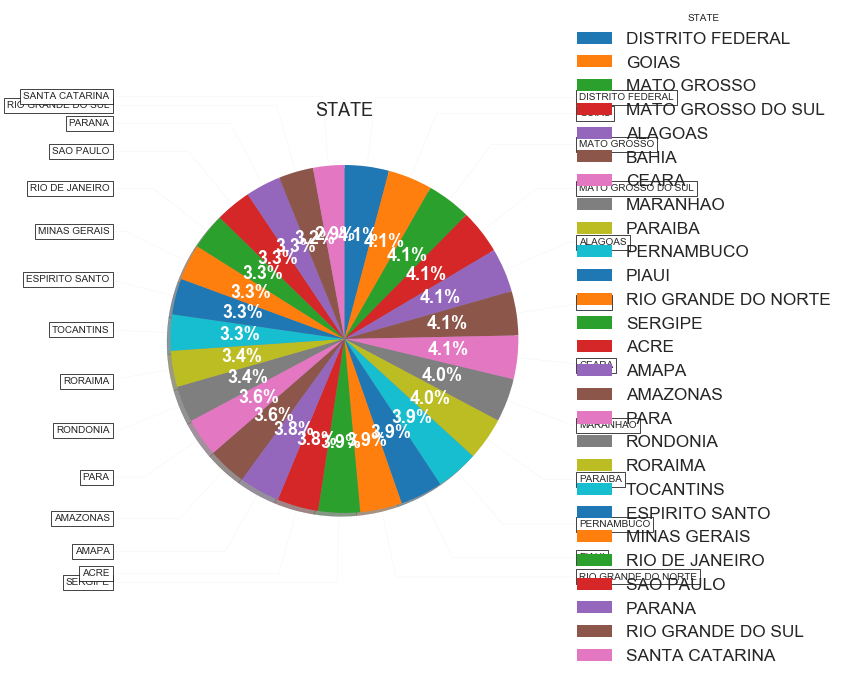

In [10]:
plt_pie_data("state",df)

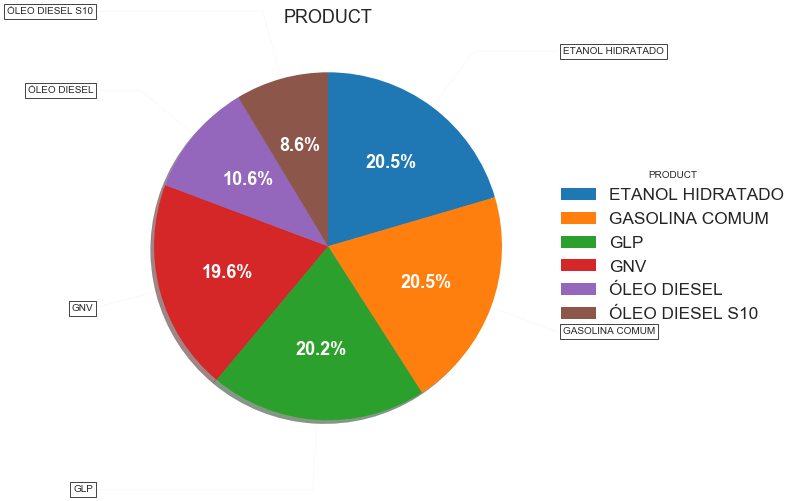

In [11]:
plt_pie_data("product",df)

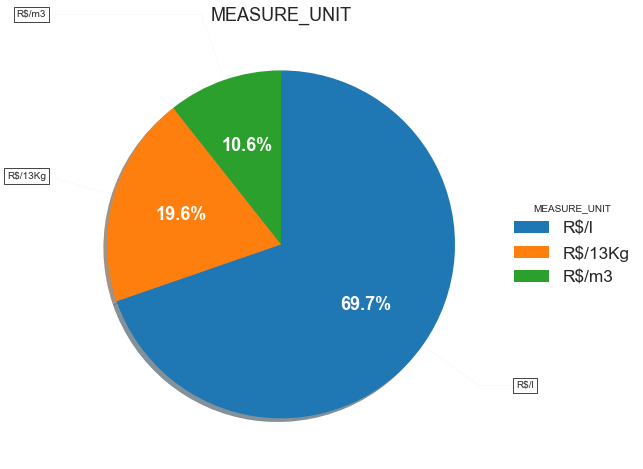

In [12]:
plt_pie_data("measure_unit",df)

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.profile_report()

In [15]:
list(df.columns)

['begin_date',
 'end_date',
 'region',
 'state',
 'product',
 'num_gas_stations',
 'measure_unit',
 'mean_resale_price',
 'std_resale_price',
 'min_resale_price',
 'max_resale_price',
 'mean_resale_margin',
 'coef_resale_variation',
 'mean_distribution_price',
 'std_distribution_price',
 'min_distribution_price',
 'max_distribution_price',
 'coef_distribution_variation',
 'month',
 'year']

In the first two columns we can see begin date and end date. In last two columns we can see month and year, which is not really necessary since we can obtain those from the two first. Another intresting thing to observe is that it could be possible to have a begin date in a certain month and the end date in another month or even another year. 


(Edit This)

In [16]:
min(df['num_gas_stations'])

1

In [17]:
df['product'].unique().tolist()

['ETANOL HIDRATADO',
 'GASOLINA COMUM',
 'GLP',
 'GNV',
 'ÓLEO DIESEL',
 'ÓLEO DIESEL S10']

In [18]:
df['measure_unit'].unique().tolist()

['R$/l', 'R$/13Kg', 'R$/m3']

In [19]:
df[df['num_gas_stations'] >= 100].count()

begin_date                     55536
end_date                       55536
region                         55536
state                          55536
product                        55536
num_gas_stations               55536
measure_unit                   55536
mean_resale_price              55536
std_resale_price               55536
min_resale_price               55536
max_resale_price               55536
mean_resale_margin             55536
coef_resale_variation          55536
mean_distribution_price        55536
std_distribution_price         55536
min_distribution_price         55536
max_distribution_price         55536
coef_distribution_variation    55536
month                          55536
year                           55536
dtype: int64

In [20]:
print('Mean of gas station =  {:6.2f} and std = {:6.2f}'.format(df['num_gas_stations'].mean(), 
                                                      df['num_gas_stations'].std()))

Mean of gas station =  240.51 and std = 408.04


As we can see we have a good mean value, but a huge standard deviation in this case (almost twice as the mean value). Which means some gas stations should have a low quantity.

In [21]:
import calendar
calendar.monthrange(2010, 1)[1] #gives the last day of the month of a certain year

df2 = pd.read_csv('gas.csv',sep = '\t')
if df2.empty:
    df2 = pd.DataFrame(columns=['begin_date','end_date','month','year'])
    for row in df.itertuples(index=False):
        if row.begin_date.month != row.end_date.month:
            lastDay = calendar.monthrange(row.begin_date.year, row.begin_date.month)[1]
            if row.begin_date.day != lastDay:
                temp = row._asdict()
                temp.update({'end_date': row.begin_date.replace(day=lastDay),'month': row.begin_date.month,'year': row.begin_date.year})
                df2 = df2.append(temp, ignore_index=True)
                temp.update({'begin_date': row.end_date.replace(day=1),'end_date': row.end_date,'month': row.end_date.month,'year': row.end_date.year})
                df2 = df2.append(temp, ignore_index=True)
            else:
                temp = row._asdict()
                temp.update({'end_date': row.begin_date,'month': row.begin_date.month,'year': row.begin_date.year})
                df2 = df2.append(temp, ignore_index=True)
                temp.update({'begin_date': row.end_date.replace(day=1),'end_date': row.end_date,'month': row.end_date.month,'year': row.end_date.year})
                df2 = df2.append(temp, ignore_index=True)
        else:
            df2 = df2.append(row._asdict(), ignore_index=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123767 entries, 0 to 123766
Data columns (total 21 columns):
Unnamed: 0                     123767 non-null int64
begin_date                     123767 non-null object
end_date                       123767 non-null object
month                          123767 non-null int64
year                           123767 non-null int64
coef_distribution_variation    123767 non-null float64
coef_resale_variation          123767 non-null float64
max_distribution_price         123767 non-null float64
max_resale_price               123767 non-null float64
mean_distribution_price        123767 non-null float64
mean_resale_margin             123767 non-null float64
mean_resale_price              123767 non-null float64
measure_unit                   123767 non-null object
min_distribution_price         123767 non-null float64
min_resale_price               123767 non-null float64
num_gas_stations               123767 non-null float64
product           

Let's see how the gas (GLP and GLV) mean price behaves according through the years.

In [22]:
gas_mean_year = df2.query('product in ["GLP","GLV"]').groupby(['year','month','region']).agg({'mean_resale_price': ['mean','min','max'], 'std_resale_price': ['mean','min','max']})

In [23]:
gas_mean_year['mean_resale_price'].groupby('region').agg('mean')

,mean,min,max
region,,,
CENTRO OESTE,48.110930,42.530670,55.838236
NORDESTE,42.014551,38.372632,47.026302
NORTE,46.988151,40.586813,52.218165
SUDESTE,42.023024,39.465253,45.147451
SUL,43.500712,41.952841,45.127978


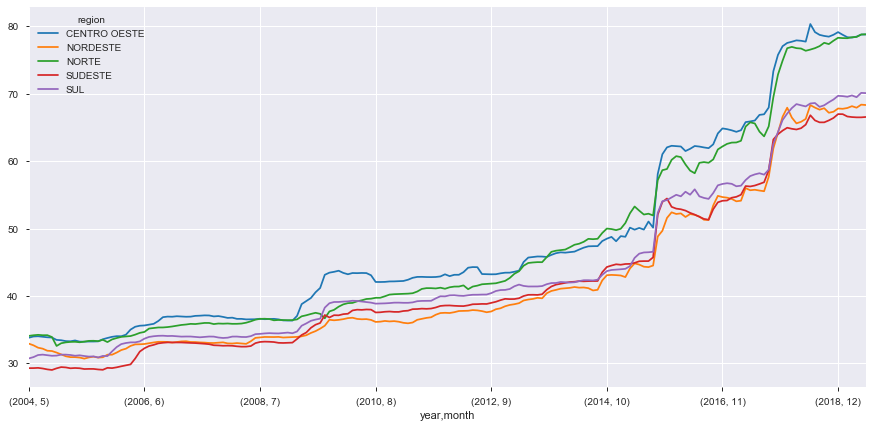

In [24]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,7))
gas_mean_year['mean_resale_price']['mean'].unstack().plot(legend=True, ax=ax)

plt.grid(True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103392 entries, 0 to 106822
Data columns (total 20 columns):
begin_date                     103392 non-null datetime64[ns]
end_date                       103392 non-null datetime64[ns]
region                         103392 non-null object
state                          103392 non-null object
product                        103392 non-null object
num_gas_stations               103392 non-null int64
measure_unit                   103392 non-null object
mean_resale_price              103392 non-null float64
std_resale_price               103392 non-null float64
min_resale_price               103392 non-null float64
max_resale_price               103392 non-null float64
mean_resale_margin             103392 non-null float64
coef_resale_variation          103392 non-null float64
mean_distribution_price        103392 non-null float64
std_distribution_price         103392 non-null float64
min_distribution_price         103392 non-null float64
m

[]

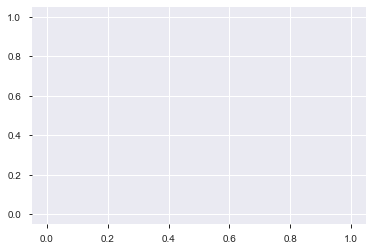

In [26]:
fig = plt.figure()
plt.plot()

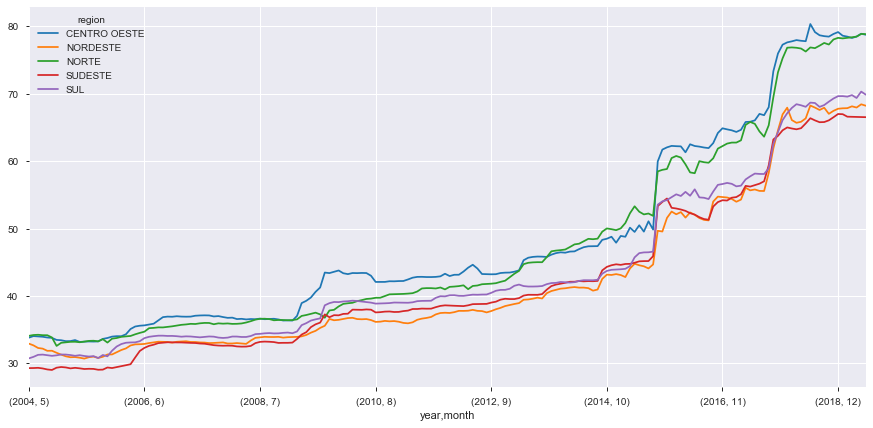

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
gas_mean_year0 = df.query('product in ["GLP","GLV"]').groupby(['year','month','region']).agg({'mean_resale_price': ['mean','min','max'], 'std_resale_price': ['mean','min','max']})
gas_mean_year0['mean_resale_price']['mean'].unstack().plot(ax=ax,legend=True)

In [28]:
gas_mean_year0

mean_resale_price                 std_resale_price  \
                                     mean     min     max             mean   
year month region                                                            
2004 5     CENTRO OESTE         33.810813  30.106  38.791         1.814687   
           NORDESTE             32.931833  31.009  35.143         1.384639   
           NORTE                34.083071  30.967  39.328         1.925964   
           SUDESTE              29.297000  28.924  29.713         1.537500   
           SUL                  30.738750  30.349  31.258         1.759583   
     6     CENTRO OESTE         34.046688  30.141  38.493         1.911750   
           NORDESTE             32.672722  30.821  35.148         1.520139   
           NORTE                34.208250  31.014  39.038         1.972964   
           SUDESTE              29.307437  28.897  29.711         1.569000   
           SUL                  30.966417  30.535  31.439         1.771083   
     7     CENTRO OESTE         34.003188  29.988  38.606         1.965812   
           NORDESTE             32.285028  30.508  34.391         1.812694   
           NORTE                34.245571  31.057  39.081         2.000857   
           SUDESTE              29.340125  28.999  29.660         1.589625   
           SUL                  31.267500  30.744  31.621         1.798167   
     8     CENTRO OESTE         33.948100  29.993  38.529         2.074350   
           NORDESTE             32.186822  30.414  34.851         1.759044   
           NORTE                34.181257  31.147  39.052         1.994143   
           SUDESTE              29.247700  28.846  29.555         1.638200   
           SUL                  31.304200  30.735  31.705         1.804933   
     9     CENTRO OESTE         33.837313  30.090  38.445         2.086375   
           NORDESTE             31.863657  29.944  33.875         1.932657   
           NORTE                34.176964  31.236  39.030         2.026107   
           SUDESTE              29.098938  28.779  29.366         1.702625   
           SUL                  31.206167  30.696  31.537         1.891083   
     10    CENTRO OESTE         33.785700  29.184  38.360         2.052800   
           NORDESTE             31.874159  29.885  33.708         1.734864   
           NORTE                33.846457  29.416  39.039         2.024600   
           SUDESTE              29.023600  28.696  29.320         1.632000   
           SUL                  31.118067  30.301  32.117         1.910600   
...                                   ...     ...     ...              ...   
2019 1     CENTRO OESTE         78.615250  70.736  97.802         6.806312   
           NORDESTE             67.846028  62.839  73.182         4.640306   
           NORTE                78.218321  71.371  85.000         5.546964   
           SUDESTE              66.973500  64.304  70.609         5.230125   
           SUL                  69.655333  69.066  70.079         5.693667   
     2     CENTRO OESTE         78.482813  70.205  98.007         6.617125   
           NORDESTE             67.867472  62.392  73.665         4.447889   
           NORTE                78.294929  71.362  84.542         5.277071   
           SUDESTE              66.604250  63.509  70.232         5.265000   
           SUL                  69.575500  68.764  70.148         5.695667   
     3     CENTRO OESTE         78.282100  69.889  97.182         6.540750   
           NORDESTE             68.139867  62.098  75.317         4.361156   
           NORTE                78.385771  72.143  84.708         5.244171   
           SUDESTE              66.583000  64.147  70.279         5.227450   
           SUL                  69.806467  68.734  71.110         5.604600   
     4     CENTRO OESTE         78.493312  70.283  97.565         6.462437   
           NORDESTE             67.959667  62.758  75.221         4.282417   
           NORTE                78.485000  72.

SyntaxError: invalid token (<ipython-input-32-6f290e64ff23>, line 1)

In [ ]:
#figRegion = plt.figure(figsize=(15,7))
#figRegion, axRegion = plt.subplots(5, 1, sharex=True, figsize=(15,7))
for i,region in enumerate(df2.region.unique().tolist(),start=0):
        plt.figure(figsize=(15,7))
        df2.query('product in ["GLP","GLV"] & region in "'+region+'"').groupby(['year','month','state']).agg(
            {'mean_resale_price': ['mean','min','max'], 
             'std_resale_price': ['mean','min','max']})['mean_resale_price']['mean'].unstack().plot(legend=True)

In [45]:
def calc_percentual_variation(x):
    return x[1]/x[0]

x=df2.query('product in ["GLP","GLV"] and region in "'+region+'"').groupby(['state']).agg(
    {'mean_resale_price': ['min','max']})
print(x.apply(lambda,axis=1))
selected_dates = df2.query('product in ["GLP","GLV"] and region in "'+region+'"').groupby(['state']).agg({'begin_date': ['min'], 'end_date': ['max']})
z = df2.query('product in ["GLP","GLV"] and region in "'+region+'" and begin_date in "'+selected_dates.iloc[0,0]+'"').groupby(['state']).agg({'mean_resale_price': 'min'})
z2 = df2.query('product in ["GLP","GLV"] and region in "'+region+'" and end_date in "'+selected_dates.iloc[0,1]+'"').groupby(['state']).agg({'mean_resale_price': 'max'})
print(z2/z)
print(z2)

state
PARANA               2.399151
RIO GRANDE DO SUL    2.334213
SANTA CATARINA       2.347990
dtype: float64
                   mean_resale_price
state                               
PARANA                      2.286174
RIO GRANDE DO SUL           2.282174
SANTA CATARINA              2.274491
                   mean_resale_price
state                               
PARANA                        70.277
RIO GRANDE DO SUL             69.442
SANTA CATARINA                69.977


In [31]:
z = df2.query('product in ["GLP","GLV"] & region in "'+region+'" & begin_date in "'+selected_dates.iloc[0,0]+'"').groupby(['state']).agg({'mean_resale_price': 'min'})
z2 = df2.query('product in ["GLP","GLV"] & region in "'+region+'" & end_date in "'+selected_dates.iloc[0,1]+'"').groupby(['state']).agg({'mean_resale_price': 'max'})
print(z2/z)

                   mean_resale_price
state                               
PARANA                      2.286174
RIO GRANDE DO SUL           2.282174
SANTA CATARINA              2.274491


In [46]:
x

mean_resale_price        
                                min     max
state                                      
PARANA                       29.440  70.631
RIO GRANDE DO SUL            30.301  70.729
SANTA CATARINA               30.702  72.088